## Name Jitender Kumar
## LetsGrowMore
## VIRTUAL INTERNSHIP PROGRAMME 2021
## 1) Exploratory Data Analysis on Dataset - Terrorism 
## 02 INTERMEDIATE LEVEL TASK

In [1]:
#imporing important library to work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
terrorism_df=pd.read_csv('globalterrorismdb_0718dist.csv')# reading the dataset

In [3]:
terrorism_df.head() #here is the head of dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism_df.shape #total shape ie.rows and columns

(181691, 135)

In [9]:
terrorism_df.columns.to_list()# list of columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
terrorism_df.info() # here is the info of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
terrorism_df.describe().transpose()# total statistical columns of the dataset

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [11]:
# before we go for further process we need to rename some columns
terrorism_df.rename(columns=({'eventid':'Id','iyear':'Year','imonth':'Month','iday':'Day','approxdate':'Date','provstate':'State','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','weaptype1_txt':'weapontype','targtype1_txt':'Target_type','gname':'group'}),inplace=True)

In [12]:
terrorism_df.head() #Dataframe of the dataset global terrorism

,Id,Year,Month,Day,Date,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
terrorism_df.isna().sum() # checking null value

Id               0
Year             0
Month            0
Day              0
Date        172452
             ...  
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related     156653
Length: 135, dtype: int64

###  We don't need all the columns to work with so we either drop unnecessry columns or create a new datafram to work with.

In [18]:
# so we are creating a new dataframe 
#let's create a new datafram 
global_terrorism_df = terrorism_df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','summary','group','Target_type','weapontype','motive']]
global_terrorism_df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,group,Target_type,weapontype,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## Cleaning the Data

In [19]:
global_terrorism_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
summary         66129
group               0
Target_type         0
weapontype          0
motive         131130
dtype: int64

In [23]:
global_terrorism_df['Killed']=terror_df['Killed'].fillna(0).astype(int)
global_terrorism_df['State']=terror_df['State'].fillna(0).astype(object)
global_terrorism_df['city']=terror_df['city'].fillna(0).astype(object)
global_terrorism_df['Target']=terror_df['Target'].fillna(0)
global_terrorism_df['Wounded']=terror_df['Wounded'].fillna(0).astype(int)

In [26]:
(round(global_terrorism_df.isnull().sum()/len(global_terrorism_df)*100),)#  checking percentage of data 

(Year            0.0
 Month           0.0
 Day             0.0
 Country         0.0
 State           0.0
 Region          0.0
 city            0.0
 latitude        3.0
 longitude       3.0
 AttackType      0.0
 Killed          0.0
 Wounded         0.0
 Target          0.0
 summary        36.0
 group           0.0
 Target_type     0.0
 weapontype      0.0
 motive         72.0
 dtype: float64,)

### As we can see that Motive has Max number of null value so either we drop it or leave it as it is.

In [36]:
# Now we can proceed with EDA
pd.DataFrame(global_terrorism_df['Year'].value_counts().head())

,Year
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


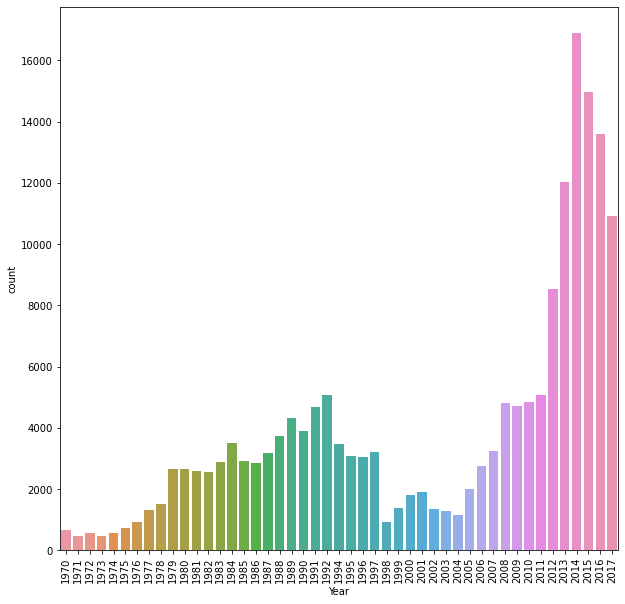

In [39]:
plt.figure(figsize=[10,10])
sns.countplot(x=global_terrorism_df['Year'])
plt.xticks(rotation=90);

# The terrorism attack took place in 2014 killed maximum people i.e. approx 17000 

In [37]:
pd.DataFrame(terror_df['Country'].value_counts().head(20)) # the country which affected most by terrorism are Iraq,Pakistan,Afganistan and India

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


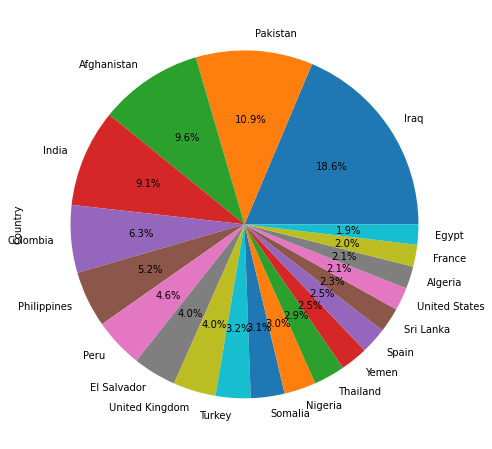

In [38]:
plt.figure(figsize=[12,8])# visualizing the dataset
terror_df['Country'].value_counts().head(20).plot.pie(autopct="%1.1f%%");

In [40]:
pd.DataFrame(terror_df['city'].value_counts().head(10)) # City attacked by terrorist are

,city
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


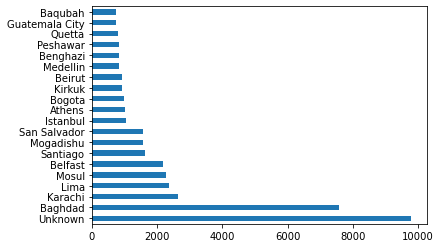

In [41]:
terror_df['city'].value_counts().head(20).plot.barh(); # see which city is most affected by terrorism

In [43]:
pd.DataFrame(terror_df['State'].value_counts().head(10)) # here is top 10 state which attacked most

,State
Baghdad,7645
Northern Ireland,4498
Unknown,4290
Balochistan,3710
Saladin,3411
Al Anbar,3299
Nineveh,3241
Sindh,3206
Khyber Pakhtunkhwa,3084
Diyala,3041


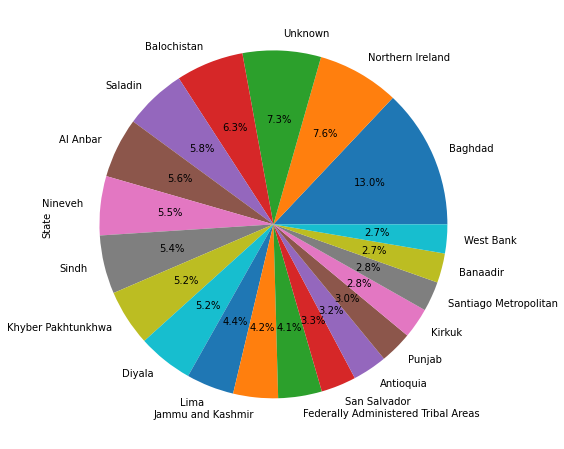

In [44]:
plt.figure(figsize=[12,8])# visualizing the dataset
terror_df['State'].value_counts().head(20).plot.pie(autopct="%1.1f%%");

In [45]:
pd.DataFrame(terror_df['AttackType'].value_counts())

,AttackType
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


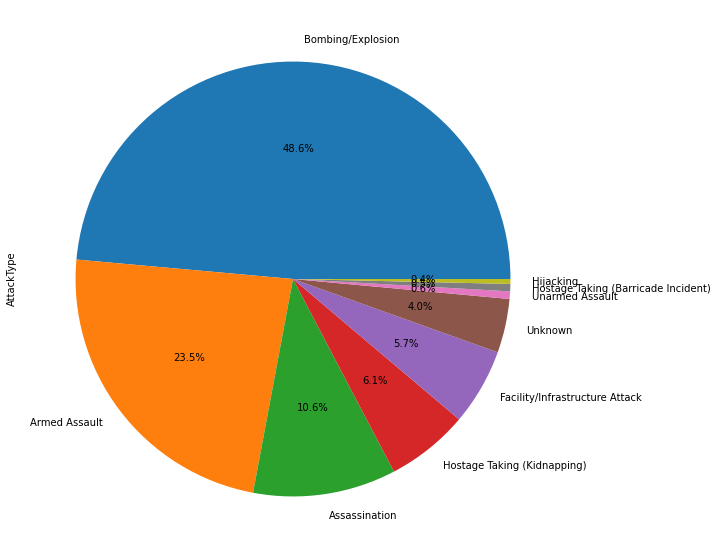

In [53]:
plt.figure(figsize=[12,10]) # let's check it out by visualizing the data
global_terrorism_df['AttackType'].value_counts().plot.pie(autopct="%1.1f%%");


# most attack type are Bombing Explosion,armed assault and Assassination

In [55]:
# see the attack type which killed max people 
attack_killed = global_terrorism_df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


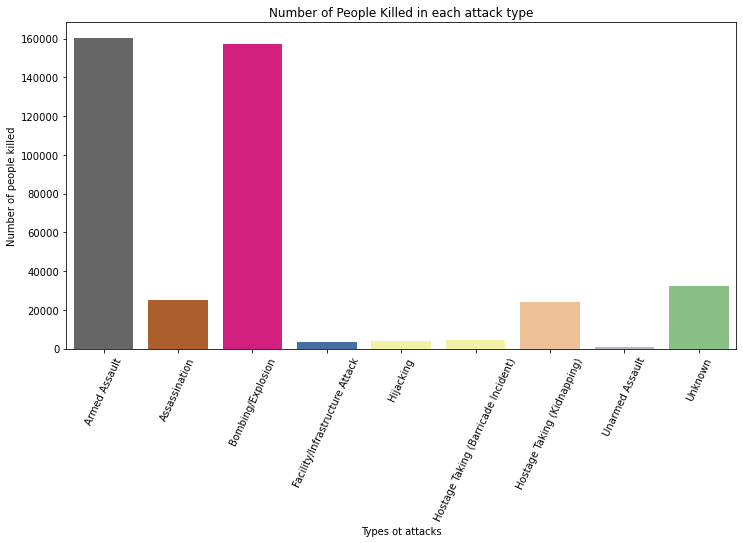

In [59]:
plt.subplots(figsize=(12,6)) # check the plot which will clear you most
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="Accent_r")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 65);

# Armed Assault and Bombing expllosion killed maximum people .

In [60]:
terror_city=terror_df['city'].value_counts()[:20] # checking which city is most targeted by terrorism organisation
terror_city

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: city, dtype: int64

## As we can see that Max target city is unknown after that Baghdad,Karachi,Lima,Mosul are most affected by terrorism.

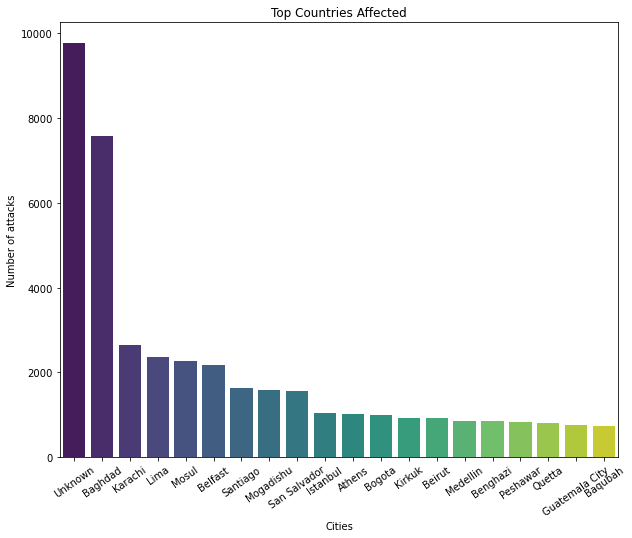

In [65]:
# after ploting we can easily understand it
plt.subplots(figsize=(10,8))
sns.barplot(terror_city.index,terror_city.values,palette='viridis')
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 35);

In [70]:
# now checking total casuality i.e. wounded and Killed by terrorism for this I have created one more columns named casualities
global_terrorism_df['casualities']=global_terrorism_df['Wounded']+global_terrorism_df['Killed']
terror_cas=global_terrorism_df.sort_values(by='casualities',ascending=False)[:30]
terror_cas

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,group,Target_type,weapontype,motive,casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570
159773,2016,3,9,Iraq,Kirkuk,Middle East & North Africa,Taza Khurmatu,35.303047,44.329933,Bombing/Explosion,3,1500,Subdistrict,03/09/2016: Assailants fired 60 rockets holdin...,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Chemical,NaN,1503
61548,1996,1,31,Sri Lanka,Western,South Asia,Colombo,6.941837,79.861687,Bombing/Explosion,90,1272,Bank,NaN,Liberation Tigers of Tamil Eelam (LTTE),Business,Explosives,NaN,1362
55934,1994,4,13,Rwanda,Kigali,Sub-Saharan Africa,Gikoro,-1.932787,30.332456,Armed Assault,1180,0,Group of Tutsi Refugees inside Catholic Church,NaN,Hutu extremists,Private Citizens & Property,Firearms,NaN,1180
85682,2008,2,2,Chad,N'Djamena,Sub-Saharan Africa,N'Djamena,12.126693,15.028400,Armed Assault,160,1001,President Idriss Deby,2/2/2008: Chadian rebels attacked the capital ...,Rebels,Government (General),Firearms,The rebels were trying to topple President Idr...,1161
76953,2004,9,1,Russia,North Ossetia-Alania (Republic),Eastern Europe,Beslan,43.191626,44.541763,Hostage Taking (Barricade Incident),344,727,"School Number One (SNO) in Beslan, Russia",09/01/2004: A group of thirty to thirty-five a...,Riyadus-Salikhin Reconnaissance and Sabotage B...,Educational Institution,Explosives,Unknown,1071


In [72]:
corr=terror_cas.corr()
corr

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,-0.032080,-0.169634,0.003728,0.150097,0.132656,-0.249850,-0.203149
Month,-0.032080,1.000000,-0.270759,0.314738,-0.398737,0.105265,0.101020,0.112755
Day,-0.169634,-0.270759,1.000000,-0.057494,0.198550,-0.171906,-0.032207,-0.062604
latitude,0.003728,0.314738,-0.057494,1.000000,-0.223085,-0.017608,0.131062,0.116579
longitude,0.150097,-0.398737,0.198550,-0.223085,1.000000,-0.196272,-0.258780,-0.274700
Killed,0.132656,0.105265,-0.171906,-0.017608,-0.196272,1.000000,0.354211,0.516918
Wounded,-0.249850,0.101020,-0.032207,0.131062,-0.258780,0.354211,1.000000,0.983632
casualities,-0.203149,0.112755,-0.062604,0.116579,-0.274700,0.516918,0.983632,1.000000


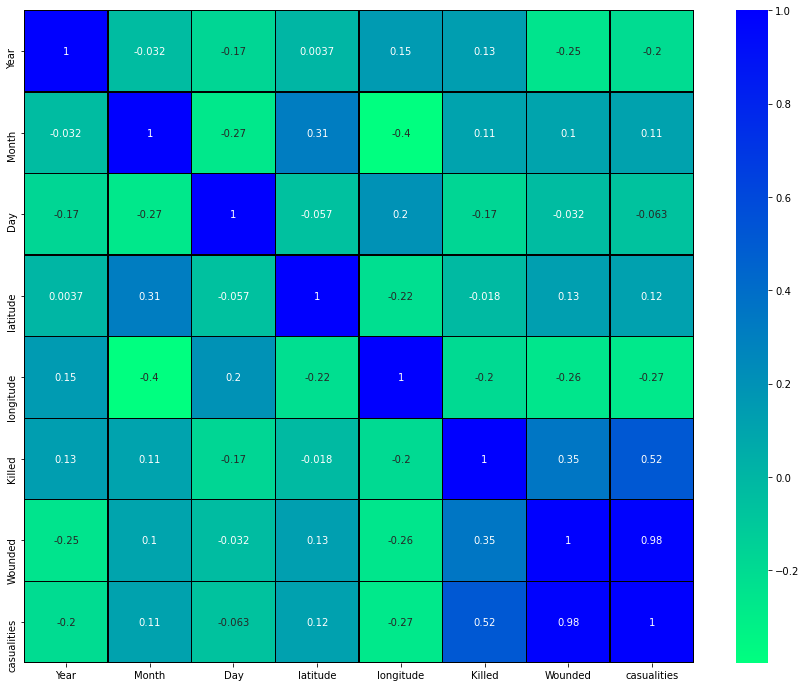

In [79]:
plt.figure(figsize=[15,12])
sns.heatmap(corr,annot=True,cmap='winter_r',linecolor='black',linewidths=0.3);

## maximum correlation are in between Wounded and Casualities

In [81]:
attack_wounded = global_terrorism_df[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77365
Assassination,13887
Bombing/Explosion,372686
Facility/Infrastructure Attack,3765
Hijacking,17001
Hostage Taking (Barricade Incident),3966
Hostage Taking (Kidnapping),6446
Unarmed Assault,14027
Unknown,14725


In [93]:
pd.DataFrame(global_terrorism_df['Target'].value_counts().head(20)) # here is the Target of terrorist

,Target
Civilians,6461
Unknown,5918
Soldiers,3157
Patrol,2942
Checkpoint,2905
Vehicle,2785
Officers,1787
Village,1679
Military Unit,1533
Bus,1335


## At most civilian were targeted after that soliders

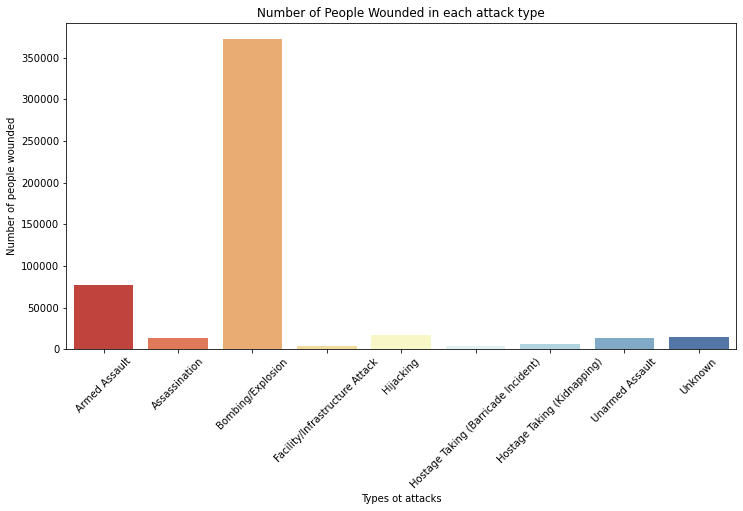

In [89]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_wounded.index, attack_wounded.Wounded.values,palette="RdYlBu")
plt.title('Number of People Wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 45)
plt.show()

__The most number of people wounded by Bombing/Explosion i.e.approx 38000__

In [90]:
terror_df['motive'].value_counts().head(15)

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             14889
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Maximum motive for Attack is Unknown 

### Thank you😊😊😊😊